In [96]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import  crosstab
from scipy import stats
import scikit_posthocs as sp
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from mlxtend.plotting import plot_confusion_matrix

In [101]:
url = "https://raw.githubusercontent.com/RexTime007/Mobile-App-for-MSL-detection/main/Experimentaci%C3%B3n/Experimentacion_General.csv"
df = pd.read_csv(url)

# Ahora puedes usar el DataFrame df como lo desees


In [112]:
cm_general = generales =  pd.read_csv("General.csv", encoding='latin-1')

In [113]:
cm_general.rename(columns={0:'RESULTANTES'})

,Unnamed: 0,SEÑA ESPERADA,RESULTANTES,Tipo,PERSONA
0,0,A,A,0,1
1,1,B,B,0,1
2,2,C,MAL,0,1
3,3,D,D,0,1
4,4,E,E,0,1
...,...,...,...,...,...
550,180,NO,N,1,5
551,181,SI,I,1,5
552,182,PERDÓN,PERDÓN,1,5
553,183,TU,TU,1,5


In [114]:
cm_general2 =  cm_general.copy()

In [115]:
cm_general2 =  pd.DataFrame(cm_general2)


**Precision, Recall, Accuracy  & Recall**

In [116]:
label = LabelEncoder()

In [117]:
def prec(df, resultante):
    y = label.fit_transform(df['SEÑA ESPERADA'])
    y_pred =  label.fit_transform(df[resultante])
    preci = precision_score(df['SEÑA ESPERADA'], df[resultante], average='macro')
    #confusion_matrix(df['SEÑA ESPERADA'], df[resultante])
    print("Precision: ",preci)
    recall =  recall_score(df['SEÑA ESPERADA'], df[resultante], average='macro')
    print("Recall: ", recall)
    acc = accuracy_score(df['SEÑA ESPERADA'], df[resultante])
    print("Accuracy: ", acc)

#    auc = roc_auc_score(y, y_pred, multi_class='ovr')
 #   print("ROC AUC", auc)



In [118]:
grall =  prec(cm_general2, 'RESULTANTES')

Precision:  0.8163138638757833
Recall:  0.8072072072072072
Accuracy:  0.8072072072072072


In [119]:
huawei = prec(df, 'HUAWEI/5001')
huawei

Precision:  0.8457207207207207
Recall:  0.8216216216216216
Accuracy:  0.8216216216216217


In [120]:
s8 = prec(df, 'S8/5003')
s8

Precision:  0.8265015015015015
Recall:  0.7999999999999999
Accuracy:  0.8


In [121]:
a32 = prec(df, 'SAMSUNG-B/5000')
a32

Precision:  0.8280995280995281
Recall:  0.8
Accuracy:  0.8


**Separacion Dinamicas y estaticas**

In [122]:
estaticas = df[df['TIPO']== 0]
dinamicas = df[df['TIPO']== 1]

In [123]:
estaticas

,SEÑA ESPERADA,HUAWEI/5001,DISTANCIA TOTAL,#INCIDENCIAS,FALSAS,SAMSUNG-B/5000,DISTANCIA TOTAL.1,#INCIDENCIAS.1,FALSAS.1,S8/5003,DISTANCIA TOTAL.2,#INCIDENCIAS.2,FALSAS.2,TIPO,PERSONA
0,A,A,121468.20750,10,E/S/T,A,101640.17990,9,E/S,A,96765.05204,9,E/S,0,1
1,B,B,53115.07721,7,HOLA/MAL,MAL,67748.49749,7,F/M,B,67062.76932,6,F/HOLA/M/MAL,0,1
2,C,MAL,62879.07308,6,M/O/ï,C,50758.82235,8,M/MAL/O/ï,C,74538.97007,8,M/MAL/O/ï,0,1
3,D,D,175317.44140,13,-,D,122097.91920,13,-,D,151554.62550,13,-,0,1
4,E,E,167369.35860,13,O,E,153094.39190,12,A,E,32620.59733,13,-,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,T,A,83667.10200,5,E/NO/O/T/TU,T,6446.44200,6,A/S/SI,T,85446.37800,7,A/S/SI,0,5
101,U,U,119670.98400,11,R/ï¿,U,97169.85900,11,R,U,122722.66600,12,R,0,5
102,V,V,149880.59300,13,-,V,134990.25200,13,-,V,147219.02700,13,-,0,5
103,W,W,121050.13900,13,-,W,119875.74000,13,-,W,125064.95200,13,-,0,5


In [124]:
print("Estatica")
huawei_estatica = prec(estaticas, 'HUAWEI/5001')
print("Dinamica")
huawei_dinamica = prec(dinamicas, 'HUAWEI/5001')


Estatica
Precision:  0.8216765873015873
Recall:  0.7416666666666666
Accuracy:  0.8476190476190476
Dinamica
Precision:  0.6812500000000001
Recall:  0.6300000000000001
Accuracy:  0.7875


C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [125]:
print("Estatica")
A32_estatica = prec(estaticas, 'SAMSUNG-B/5000')
print("Dinamica")
A32_dinamica = prec(dinamicas, 'SAMSUNG-B/5000')

Estatica
Precision:  0.8768115942028986
Recall:  0.8434782608695653
Accuracy:  0.9238095238095239
Dinamica
Precision:  0.5653679653679654
Recall:  0.4636363636363636
Accuracy:  0.6375


C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [126]:
print("Estatica")
S8_estatica = prec(estaticas, 'S8/5003')
print("Dinamica")
S8_dinamicas = prec(dinamicas, 'S8/5003')

Estatica
Precision:  0.9117424242424242
Recall:  0.8909090909090908
Accuracy:  0.9333333333333333
Dinamica
Precision:  0.5233333333333333
Recall:  0.4
Accuracy:  0.625


C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
estaticas_gral = cm_general2[cm_general2['Tipo']== 0]
dinamicas_gral = cm_general2[cm_general2['Tipo']== 1]

In [128]:
print("Estatica")
gral_estatica = prec(estaticas_gral, 'RESULTANTES')
print("Dinamica")
gral_dinamicas = prec(dinamicas_gral, 'RESULTANTES')

Estatica
Precision:  0.7894575163398693
Recall:  0.7573333333333333
Accuracy:  0.9015873015873016
Dinamica
Precision:  0.526832848524025
Recall:  0.4205128205128205
Accuracy:  0.6833333333333333


C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Conversion a 1 y 0 para determinar si todos los dispositivos tuvieron la seña exitosa para mostrar la prueba de Kruskal**

In [129]:
df_data = df.copy()
df_estaticas =  estaticas.copy()
df_dinamicas = dinamicas.copy()

In [130]:
#Primera parte pedida, cambiar los valores a 0 y 1
def intercambio(df_data):
    df_data['HUAWEI/5001'] = df_data.apply(lambda row: 1 if row['SEÑA ESPERADA'] == row['HUAWEI/5001'] else 0, axis=1)
    df_data['SAMSUNG-B/5000'] = df_data.apply(lambda row: 1 if row['SEÑA ESPERADA'] == row['SAMSUNG-B/5000'] else 0, axis=1)
    df_data['S8/5003'] = df_data.apply(lambda row: 1 if row['SEÑA ESPERADA'] == row['S8/5003'] else 0, axis=1)

In [131]:
intercambio(df_data)
intercambio(df_estaticas)
intercambio(df_dinamicas)

In [132]:
def dunn(df):
    data = [df['DISTANCIA TOTAL'],
            df['DISTANCIA TOTAL.1'],
            df['DISTANCIA TOTAL.2']]
    print(sp.posthoc_dunn(data, p_adjust = 'holm'))
    print()

In [133]:
# Filtrar las filas según las condiciones especificadas
def contar_filas_con_condiciones(df):
    filtro = (df['HUAWEI/5001'] == 1) & (df['SAMSUNG-B/5000'] == 1) & (df['S8/5003'] == 1)
    filas_filtradas = df[filtro]
    return filas_filtradas

datos_exitosos = pd.DataFrame(contar_filas_con_condiciones(df_data))

In [134]:
def contar_filas_con_condiciones_negativas(df):
    filtro = (df['HUAWEI/5001'] == 0) | (df['SAMSUNG-B/5000'] == 0) | (df['S8/5003'] == 0)
    filas_filtradas = df[filtro]
    return filas_filtradas

df_neg = contar_filas_con_condiciones_negativas(df_data)

In [135]:
datos_exitosos_est = pd.DataFrame(contar_filas_con_condiciones(df_estaticas))
datos_exitosos_din = pd.DataFrame(contar_filas_con_condiciones(df_estaticas))

datos_negativos_est = pd.DataFrame(contar_filas_con_condiciones(df_dinamicas))
datos_negativos_din = pd.DataFrame(contar_filas_con_condiciones(df_dinamicas))

In [136]:

print("Todos acertados :",stats.kruskal(datos_exitosos['DISTANCIA TOTAL'], datos_exitosos['DISTANCIA TOTAL.1'], datos_exitosos['DISTANCIA TOTAL.2']))
dunn(datos_exitosos)
print("Al menos uno falló :",stats.kruskal(df_neg['DISTANCIA TOTAL'], df_neg['DISTANCIA TOTAL.1'], df_neg['DISTANCIA TOTAL.2']))
dunn(df_neg)
print("Prueba con estaticas")
print("Todos acertados:",stats.kruskal(datos_exitosos_est['DISTANCIA TOTAL'], datos_exitosos_est['DISTANCIA TOTAL.1'], datos_exitosos_est['DISTANCIA TOTAL.2']))
dunn(datos_exitosos_est)
print("Al menos uno falló :",stats.kruskal(datos_negativos_est['DISTANCIA TOTAL'], datos_negativos_est['DISTANCIA TOTAL.1'], datos_negativos_est['DISTANCIA TOTAL.2']))
dunn(datos_negativos_est)
print("Prueba con dinamicas")
print("Todos acertados:",stats.kruskal(datos_exitosos_din['DISTANCIA TOTAL'], datos_exitosos_din['DISTANCIA TOTAL.1'], datos_exitosos_din['DISTANCIA TOTAL.2']))
dunn(df_estaticas)
print("Al menos uno falló :",stats.kruskal(datos_negativos_din['DISTANCIA TOTAL'], datos_negativos_din['DISTANCIA TOTAL.1'], datos_negativos_din['DISTANCIA TOTAL.2']))
dunn(df_dinamicas)


Todos acertados : KruskalResult(statistic=13.86665637306669, pvalue=0.000974751309644005)
          1         2         3
1  1.000000  0.053616  0.137371
2  0.053616  1.000000  0.000647
3  0.137371  0.000647  1.000000

Al menos uno falló : KruskalResult(statistic=1.768353009441021, pvalue=0.41305418143086303)
          1         2         3
1  1.000000  0.861626  0.657382
2  0.861626  1.000000  0.657382
3  0.657382  0.657382  1.000000

Prueba con estaticas
Todos acertados: KruskalResult(statistic=10.622806016597451, pvalue=0.004934998015133364)
          1         2         3
1  1.000000  0.107464  0.189971
2  0.107464  1.000000  0.003590
3  0.189971  0.003590  1.000000

Al menos uno falló : KruskalResult(statistic=4.293436293436287, pvalue=0.11686706967563029)
          1         2         3
1  1.000000  0.322239  0.534467
2  0.322239  1.000000  0.129369
3  0.534467  0.129369  1.000000

Prueba con dinamicas
Todos acertados: KruskalResult(statistic=10.622806016597451, pvalue=0.00493499

**REPORTE DE CLASIFICACION POR SEÑAS GENERAL**

In [137]:
print(classification_report(df['SEÑA ESPERADA'], df['SAMSUNG-B/5000'], digits=2))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         5
           B       0.43      0.60      0.50         5
        BIEN       0.83      1.00      0.91         5
           C       1.00      1.00      1.00         5
           D       0.83      1.00      0.91         5
           E       0.83      1.00      0.91         5
           F       1.00      1.00      1.00         5
           G       1.00      1.00      1.00         5
     GRACIAS       1.00      1.00      1.00         5
           H       1.00      1.00      1.00         5
        HOLA       1.00      0.20      0.33         5
           I       0.50      1.00      0.67         5
           J       1.00      1.00      1.00         5
           K       1.00      0.80      0.89         5
           L       1.00      1.00      1.00         5
           M       1.00      0.20      0.33         5
         MAL       0.44      0.80      0.57         5
           N       0.40    

In [138]:
print(classification_report(df['SEÑA ESPERADA'], df['HUAWEI/5001'], digits=2))

              precision    recall  f1-score   support

           A       0.71      1.00      0.83         5
           B       0.71      1.00      0.83         5
        BIEN       0.83      1.00      0.91         5
           C       1.00      0.40      0.57         5
           D       0.62      1.00      0.77         5
           E       1.00      1.00      1.00         5
           F       1.00      1.00      1.00         5
           G       1.00      1.00      1.00         5
     GRACIAS       1.00      1.00      1.00         5
           H       1.00      1.00      1.00         5
        HOLA       1.00      0.80      0.89         5
           I       0.83      1.00      0.91         5
           J       0.62      1.00      0.77         5
           K       0.57      0.80      0.67         5
           L       1.00      1.00      1.00         5
           M       1.00      0.20      0.33         5
         MAL       0.50      1.00      0.67         5
           N       1.00    

In [139]:
print(classification_report(df['SEÑA ESPERADA'], df['S8/5003'], digits=4))

              precision    recall  f1-score   support

           A     1.0000    1.0000    1.0000         5
           B     0.8333    1.0000    0.9091         5
        BIEN     1.0000    0.8000    0.8889         5
           C     1.0000    1.0000    1.0000         5
           D     1.0000    1.0000    1.0000         5
           E     0.8000    0.8000    0.8000         5
           F     1.0000    1.0000    1.0000         5
           G     1.0000    1.0000    1.0000         5
     GRACIAS     1.0000    1.0000    1.0000         5
           H     0.8333    1.0000    0.9091         5
        HOLA     1.0000    0.8000    0.8889         5
           I     0.5000    1.0000    0.6667         5
           J     0.2500    0.2000    0.2222         5
           K     1.0000    0.8000    0.8889         5
           L     0.6250    1.0000    0.7692         5
           M     0.6250    1.0000    0.7692         5
         MAL     1.0000    1.0000    1.0000         5
           N     0.8000    

**REPORTE DE CLASIFICACION POR SEÑAS ESTATICAS**


In [140]:
print(classification_report(estaticas['SEÑA ESPERADA'], estaticas['SAMSUNG-B/5000'], digits=2))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         5
           B       0.50      0.60      0.55         5
           C       1.00      1.00      1.00         5
           D       1.00      1.00      1.00         5
           E       0.83      1.00      0.91         5
           F       1.00      1.00      1.00         5
           G       1.00      1.00      1.00         5
           H       1.00      1.00      1.00         5
           I       1.00      1.00      1.00         5
           L       1.00      1.00      1.00         5
           M       1.00      0.20      0.33         5
         MAL       0.00      0.00      0.00         0
           N       1.00      0.80      0.89         5
           O       1.00      1.00      1.00         5
           P       1.00      1.00      1.00         5
           R       1.00      1.00      1.00         5
           S       1.00      0.80      0.89         5
           T       1.00    

C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [148]:
print(classification_report(estaticas['SEÑA ESPERADA'], estaticas['HUAWEI/5001'], digits=2))


              precision    recall  f1-score   support

           A       0.71      1.00      0.83         5
           B       0.71      1.00      0.83         5
           C       1.00      0.40      0.57         5
           D       1.00      1.00      1.00         5
           E       1.00      1.00      1.00         5
           F       1.00      1.00      1.00         5
           G       1.00      1.00      1.00         5
           H       1.00      1.00      1.00         5
           I       1.00      1.00      1.00         5
           K       0.00      0.00      0.00         0
           L       1.00      1.00      1.00         5
           M       1.00      0.20      0.33         5
         MAL       0.00      0.00      0.00         0
           N       1.00      0.80      0.89         5
           O       1.00      1.00      1.00         5
           P       1.00      0.40      0.57         5
           R       0.62      1.00      0.77         5
           S       1.00    

C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [149]:
print(classification_report(estaticas['SEÑA ESPERADA'], estaticas['S8/5003'], digits=2))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         5
           B       1.00      1.00      1.00         5
           C       1.00      1.00      1.00         5
           D       1.00      1.00      1.00         5
           E       0.80      0.80      0.80         5
           F       1.00      1.00      1.00         5
           G       1.00      1.00      1.00         5
           H       1.00      1.00      1.00         5
           I       1.00      1.00      1.00         5
           L       1.00      1.00      1.00         5
           M       0.62      1.00      0.77         5
           N       1.00      0.80      0.89         5
           O       0.80      0.80      0.80         5
           P       1.00      1.00      1.00         5
           Q       0.00      0.00      0.00         0
           R       1.00      0.80      0.89         5
           S       1.00      1.00      1.00         5
           T       1.00    

C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

**REPORTE DE CLASIFICACION POR SEÑAS DINAMICAS**

In [150]:
print(classification_report(dinamicas['SEÑA ESPERADA'],dinamicas['S8/5003'], digits=2))


              precision    recall  f1-score   support

           B       0.00      0.00      0.00         0
        BIEN       1.00      0.80      0.89         5
     GRACIAS       1.00      1.00      1.00         5
           H       0.00      0.00      0.00         0
        HOLA       1.00      0.80      0.89         5
           I       0.00      0.00      0.00         0
           J       0.25      0.20      0.22         5
           K       1.00      0.80      0.89         5
           L       0.00      0.00      0.00         0
         MAL       1.00      1.00      1.00         5
           N       0.00      0.00      0.00         0
          NO       1.00      0.80      0.89         5
           P       0.00      0.00      0.00         0
      PERDÓN       0.50      0.20      0.29         5
           Q       0.67      0.40      0.50         5
          SI       1.00      0.80      0.89         5
           T       0.00      0.00      0.00         0
          TU       0.33    

C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [151]:
print(classification_report(dinamicas['SEÑA ESPERADA'],dinamicas['HUAWEI/5001'], digits=2))


              precision    recall  f1-score   support

        BIEN       0.83      1.00      0.91         5
           D       0.00      0.00      0.00         0
     GRACIAS       1.00      1.00      1.00         5
        HOLA       1.00      0.80      0.89         5
           I       0.00      0.00      0.00         0
           J       0.62      1.00      0.77         5
           K       1.00      0.80      0.89         5
         MAL       0.83      1.00      0.91         5
          NO       1.00      1.00      1.00         5
           P       0.00      0.00      0.00         0
      PERDÓN       1.00      0.40      0.57         5
           Q       0.50      0.20      0.29         5
          SI       1.00      0.80      0.89         5
          TU       1.00      1.00      1.00         5
           U       0.00      0.00      0.00         0
           X       1.00      0.60      0.75         5
          YO       0.83      1.00      0.91         5
           Z       1.00    

C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

In [152]:
print(classification_report(dinamicas['SEÑA ESPERADA'],dinamicas['SAMSUNG-B/5000'], digits=2))


              precision    recall  f1-score   support

           B       0.00      0.00      0.00         0
        BIEN       0.83      1.00      0.91         5
           D       0.00      0.00      0.00         0
     GRACIAS       1.00      1.00      1.00         5
        HOLA       1.00      0.20      0.33         5
           I       0.00      0.00      0.00         0
           J       1.00      1.00      1.00         5
           K       1.00      0.80      0.89         5
         MAL       0.57      0.80      0.67         5
           N       0.00      0.00      0.00         0
          NO       1.00      0.80      0.89         5
           P       0.00      0.00      0.00         0
      PERDÓN       1.00      0.40      0.57         5
           Q       0.50      0.20      0.29         5
          SI       1.00      0.60      0.75         5
          TU       0.20      0.20      0.20         5
           U       0.00      0.00      0.00         0
           X       0.33    

C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\josue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

**REPORTE GENERAL**

In [153]:
true_classes = np.unique(cm_general2['SEÑA ESPERADA'])
print("Clases en etiquetas verdaderas:", true_classes)

Clases en etiquetas verdaderas: ['A' 'B' 'BIEN' 'C' 'D' 'E' 'F' 'G' 'GRACIAS' 'H' 'HOLA' 'I' 'J' 'K' 'L'
 'M' 'MAL' 'N' 'NO' 'O' 'P' 'PERDÓN' 'Q' 'R' 'S' 'SI' 'T' 'TU' 'U' 'V' 'W'
 'X' 'Y' 'YO' 'Z' '¿CÓMO ESTÁS?' 'Ñ']


In [154]:
print(classification_report(cm_general2['SEÑA ESPERADA'],cm_general2['RESULTANTES'], digits=2))


              precision    recall  f1-score   support

           A       0.88      1.00      0.94        15
           B       0.65      0.87      0.74        15
        BIEN       0.88      0.93      0.90        15
           C       1.00      0.80      0.89        15
           D       0.79      1.00      0.88        15
           E       0.88      0.93      0.90        15
           F       1.00      1.00      1.00        15
           G       1.00      1.00      1.00        15
     GRACIAS       1.00      1.00      1.00        15
           H       0.94      1.00      0.97        15
        HOLA       1.00      0.60      0.75        15
           I       0.58      1.00      0.73        15
           J       0.65      0.73      0.69        15
           K       0.80      0.80      0.80        15
           L       0.83      1.00      0.91        15
           M       0.70      0.47      0.56        15
         MAL       0.58      0.93      0.72        15
           N       0.63    

In [155]:
names = ['A','B','C','D','E','F','G','H','I','L','M','N','O','P','R','S','T','U','V','W','Y','J','K','Ñ','Q','X','Z','BIEN','¿CÓMO ESTÁS?','GRACIAS','HOLA','MAL','NO','SI','PERDÓN','TU','YO']
namesE = ['A','B','C','D','E','F','G','H','I','L','M','N','O','P','R','S','T','U','V','W','Y']
namesD = ['J','K','Ñ','Q','X','Z','BIEN','¿CÓMO ESTÁS?','GRACIAS','HOLA','MAL','NO','SI','PERDÓN','YO']

In [156]:
len(names)

37

In [157]:
dinamicas

,SEÑA ESPERADA,HUAWEI/5001,DISTANCIA TOTAL,#INCIDENCIAS,FALSAS,SAMSUNG-B/5000,DISTANCIA TOTAL.1,#INCIDENCIAS.1,FALSAS.1,S8/5003,DISTANCIA TOTAL.2,#INCIDENCIAS.2,FALSAS.2,TIPO,PERSONA
105,J,J,68679.61219,6,PERDÓN,J,70793.29107,5,I/PERDÓN,I,134342.64010,8,J,1,1
106,K,K,104961.51560,7,P,K,96353.95109,7,P,K,97648.19828,7,P,1,1
107,Ñ,U,131183.79950,12,Ñ,U,110750.23940,10,Ñ,U,132466.12360,11,Ñ,1,1
108,Q,D,51323.70694,3,G/L/P/Q/TU/X/YO/Z,TU,89385.81538,7,D/YO/Z,X,51693.72207,5,D/Q/TU/YO/Z,1,1
109,X,X,57566.85354,5,Q/TU,TU,77956.44669,7,Q/X/YO,TU,92550.89963,10,D/Q/X,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,NO,NO,23787.14700,2,A/D/E/F/M/N/OU,N,42771.17100,5,M/NO/O/X,NO,59011.52800,6,M/NO,1,5
181,SI,SI,68384.29800,8,H/I/J,I,82819.49200,8,H/I/J,SI,67119.35600,8,H/I/J,1,5
182,PERDÓN,PERDÓN,107077.33200,7,Y,PERDÓN,91879.87600,7,Y,PERDÓN,107089.63300,8,J/Y,1,5
183,TU,TU,52692.57200,4,N/R/U/X/Z,TU,61913.25300,5,N/R/U/X/,TU,40801.46600,3,N/NO/R/U/V/X/Z,1,5


In [158]:
CMSA32 = confusion_matrix(df['SEÑA ESPERADA'], df['SAMSUNG-B/5000'], labels=names)


In [159]:
CMSA32 = pd.DataFrame(CMSA32, index = names, columns = names)

In [160]:

# Verificar clases presentes en las etiquetas verdaderas
true_classes = np.unique(df['SEÑA ESPERADA'])
print("Clases en etiquetas verdaderas:", true_classes)

# Verificar clases presentes en las etiquetas predichas
predicted_classes = np.unique(estaticas['SAMSUNG-B/5000'])
print("Clases en etiquetas predichas:", predicted_classes)

Clases en etiquetas verdaderas: ['A' 'B' 'BIEN' 'C' 'D' 'E' 'F' 'G' 'GRACIAS' 'H' 'HOLA' 'I' 'J' 'K' 'L'
 'M' 'MAL' 'N' 'NO' 'O' 'P' 'PERDÓN' 'Q' 'R' 'S' 'SI' 'T' 'TU' 'U' 'V' 'W'
 'X' 'Y' 'YO' 'Z' '¿CÓMO ESTÁS?' 'Ñ']
Clases en etiquetas predichas: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'L' 'M' 'MAL' 'N' 'O' 'P' 'R' 'S' 'T'
 'U' 'V' 'W' 'Y' 'Ñ']


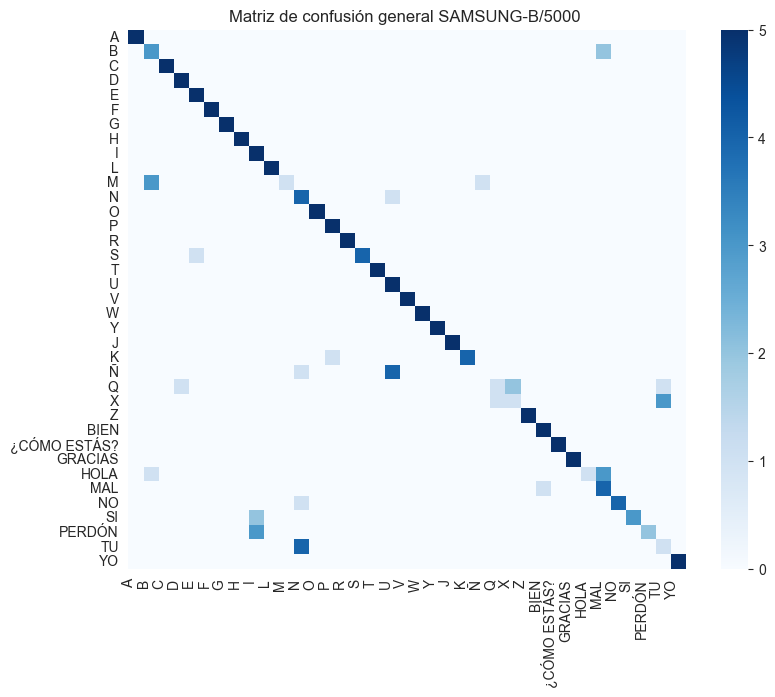

In [161]:
plt.figure(figsize=(9, 7))
plt.title("Matriz de confusión general SAMSUNG-B/5000 ")
ax = sns.heatmap(CMSA32, cmap='Blues', fmt='d', xticklabels=names, yticklabels=names)
#if you want applied numbers, you must use the next instruction, annot=True
# Rotar las etiquetas de los ejes si es necesario
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

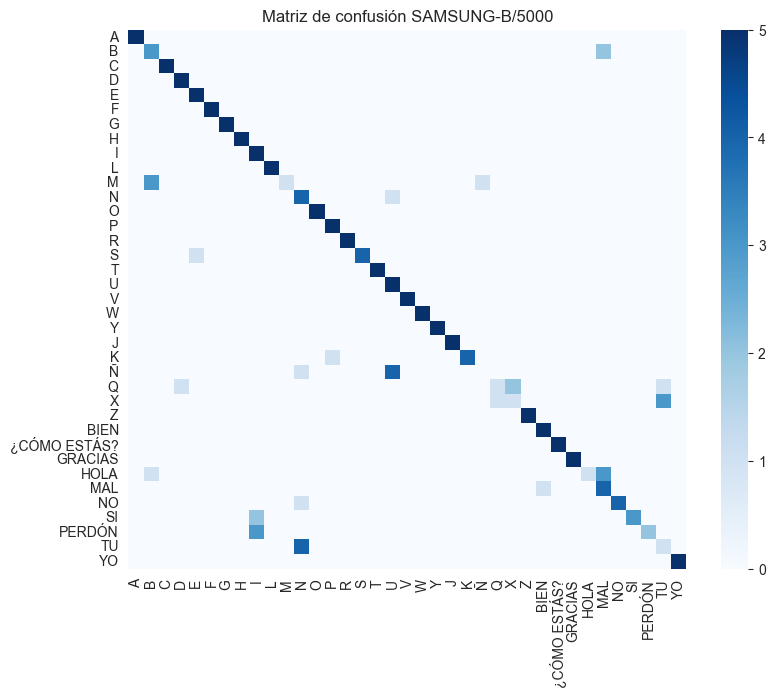

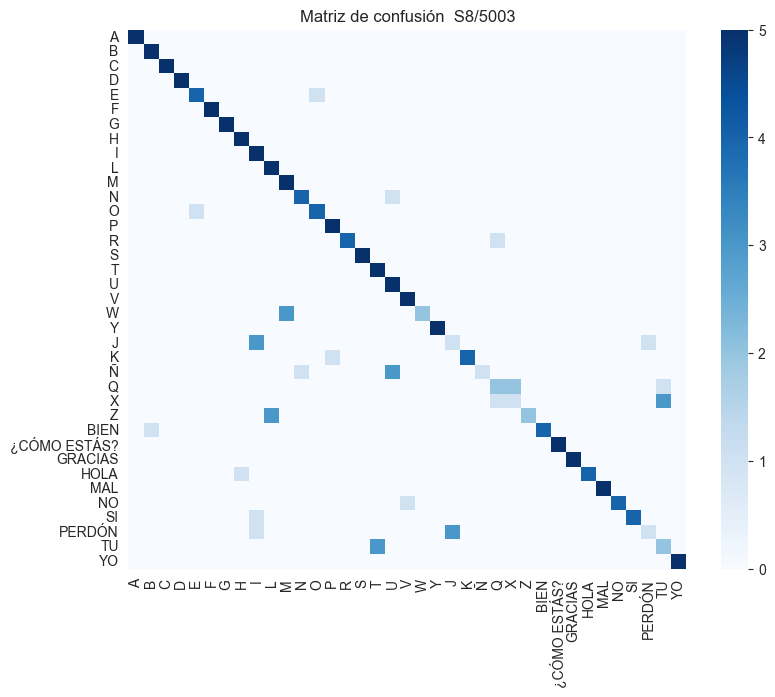

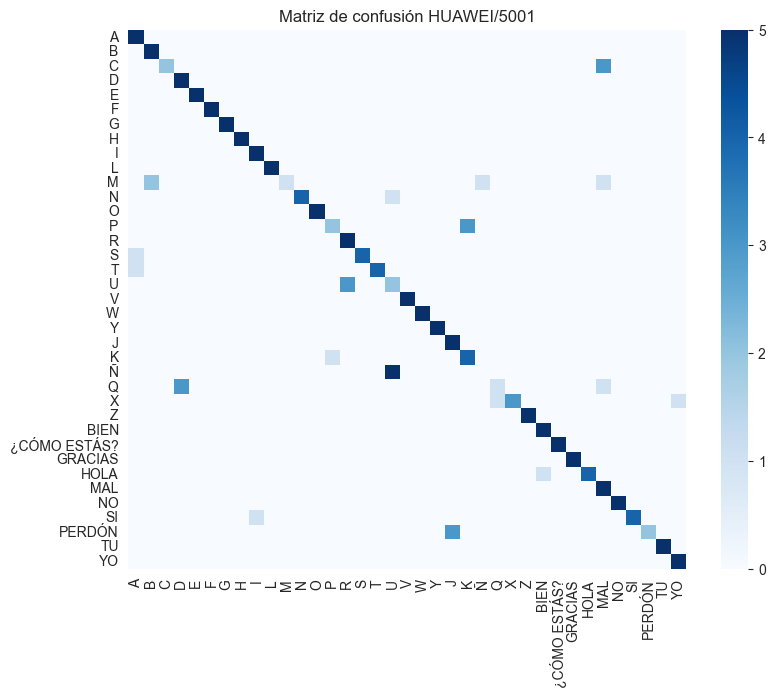

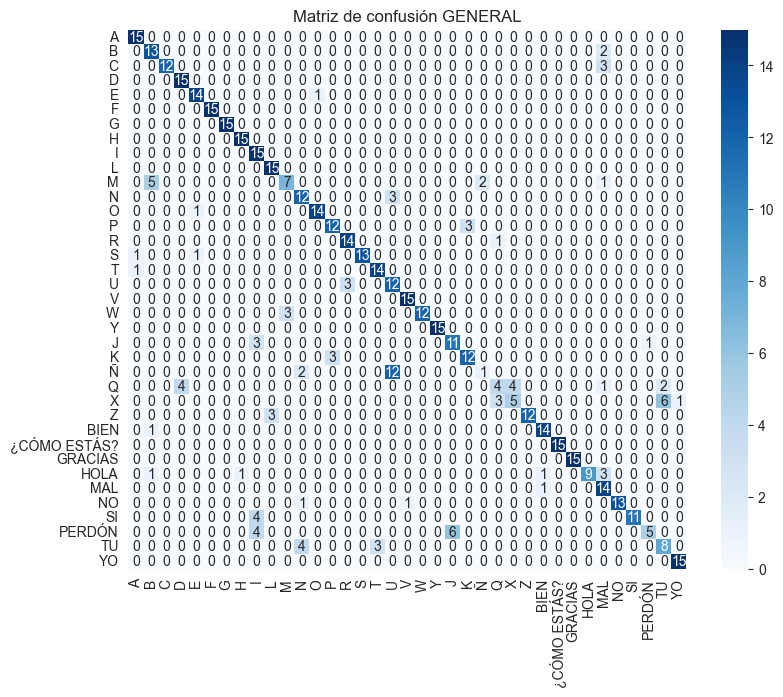

In [162]:
CMSA32 = confusion_matrix(df['SEÑA ESPERADA'], df['SAMSUNG-B/5000'], labels=names)
CMSA32 = pd.DataFrame(CMSA32, index = names, columns = names)
CMSS8 = confusion_matrix(df['SEÑA ESPERADA'], df['S8/5003'], labels=names)
CMSS8 =pd.DataFrame(CMSS8, index = names, columns = names)
CMH = confusion_matrix(df['SEÑA ESPERADA'], df['HUAWEI/5001'], labels=names)
CMH =pd.DataFrame(CMH, index = names, columns = names)

CMG = confusion_matrix(cm_general2['SEÑA ESPERADA'], cm_general2['RESULTANTES'], labels=names)
CMG =pd.DataFrame(CMG, index = names, columns = names)

# Matriz de confusión para Samsung-B/5000 en el conjunto de datos total
plt.figure(figsize=(9, 7))
plt.title("Matriz de confusión SAMSUNG-B/5000")
plt.xlabel("Obtenida")
plt.ylabel("Esperada")
sns.heatmap(CMSA32, cmap='Blues', fmt='d', xticklabels=names, yticklabels=names)
plt.show()

# Matriz de confusión para S8/5003 en el conjunto de datos total
plt.figure(figsize=(9, 7))
plt.title("Matriz de confusión  S8/5003")
plt.xlabel("Obtenida")
plt.ylabel("Esperada")
sns.heatmap(CMSS8, cmap='Blues', fmt='d', xticklabels=names, yticklabels=names)
plt.show()

# Matriz de confusión para HUAWEI/5001 en el conjunto de datos total
plt.figure(figsize=(9, 7))
plt.title("Matriz de confusión HUAWEI/5001")
plt.xlabel("Obtenida")
plt.ylabel("Esperada")
sns.heatmap(CMH, cmap='Blues', fmt='d', xticklabels=names, yticklabels=names)
plt.show()

# Matriz de confusión para General en el conjunto de datos total
plt.figure(figsize=(9, 7))
plt.title("Matriz de confusión GENERAL")
plt.xlabel("Obtenida")
plt.ylabel("Esperada")
sns.heatmap(CMG, cmap='Blues', annot=True, fmt='d', xticklabels=names, yticklabels=names)
plt.show()


In [163]:
df.columns

Index(['SEÑA ESPERADA', 'HUAWEI/5001', 'DISTANCIA TOTAL', '#INCIDENCIAS',
       'FALSAS', 'SAMSUNG-B/5000', 'DISTANCIA TOTAL.1', '#INCIDENCIAS.1',
       'FALSAS.1', 'S8/5003', 'DISTANCIA TOTAL.2', '#INCIDENCIAS.2',
       'FALSAS.2', 'TIPO', 'PERSONA'],
      dtype='object')

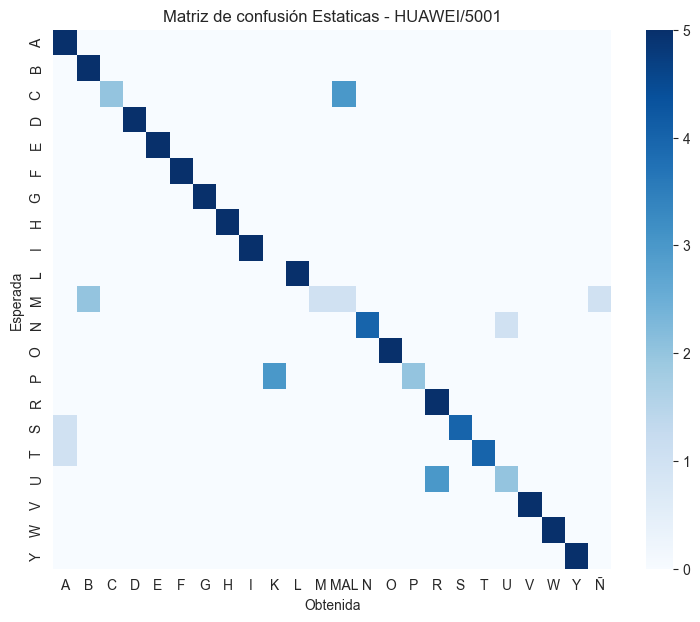

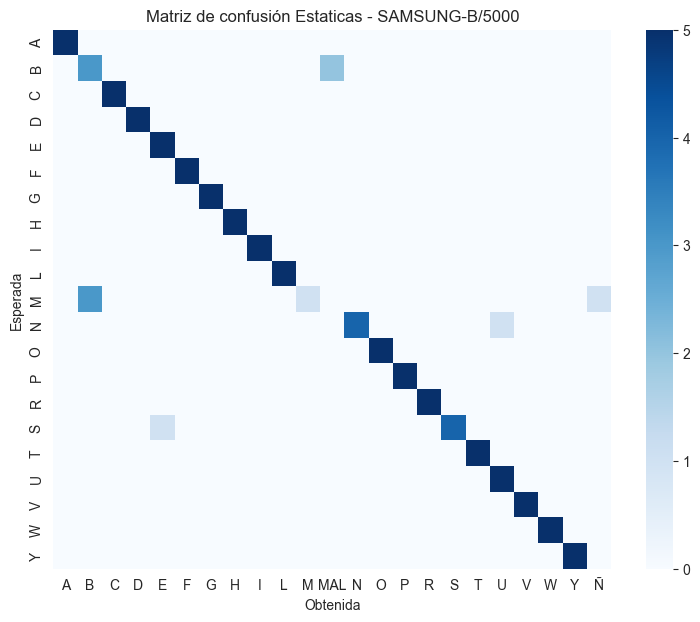

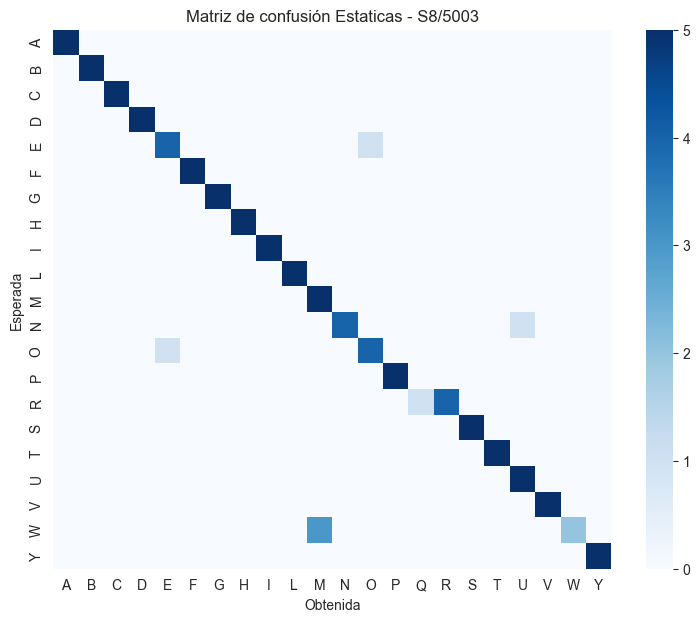

In [164]:
rows = ['HUAWEI/5001', 'SAMSUNG-B/5000','S8/5003']
for i in rows:
    # Crear una tabla cruzada para obtener la matriz de confusión
    confusion_matrix = crosstab(estaticas['SEÑA ESPERADA'], estaticas[i], rownames=['Esperada'], colnames=['Obtenida'])

    # Calcular los aciertos y errores
    total_samples = confusion_matrix.sum().sum()
    correct_predictions = sum([confusion_matrix.iloc[i,i] for i in range(len(confusion_matrix))])
    incorrect_predictions = total_samples - correct_predictions

    # Calcular el porcentaje de aciertos
    accuracy = correct_predictions / total_samples
    plt.figure(figsize=(9, 7))
    sns.heatmap(confusion_matrix, cmap='Blues', fmt='g')
    # Ajustar el tamaño del gráfico
    # Agregar el título del gráfico
    plt.title(f"Matriz de confusión Estaticas - {i}")

    # Agregar el porcentaje de aciertos en el gráfico
    # Mostrar el gráfico
    plt.show()


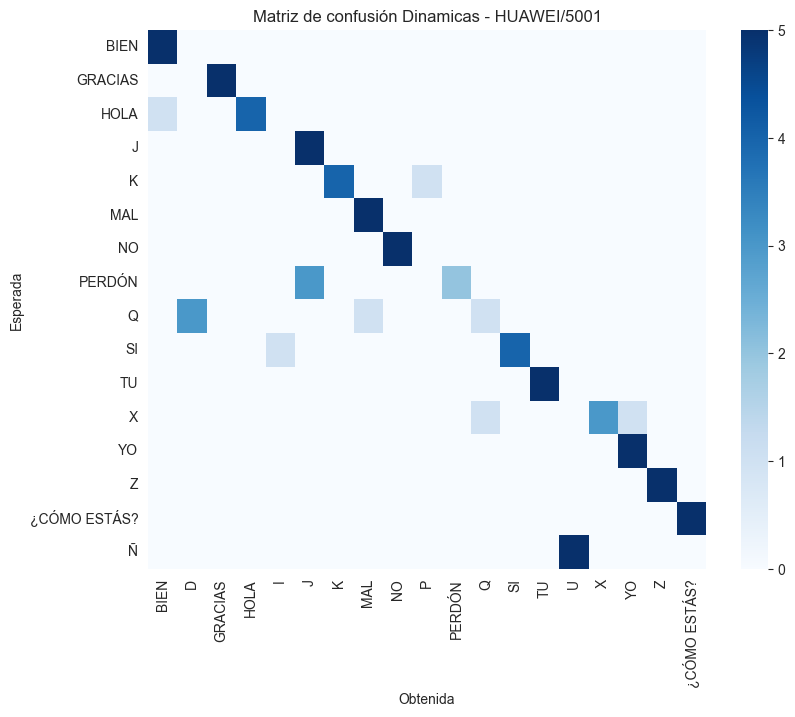

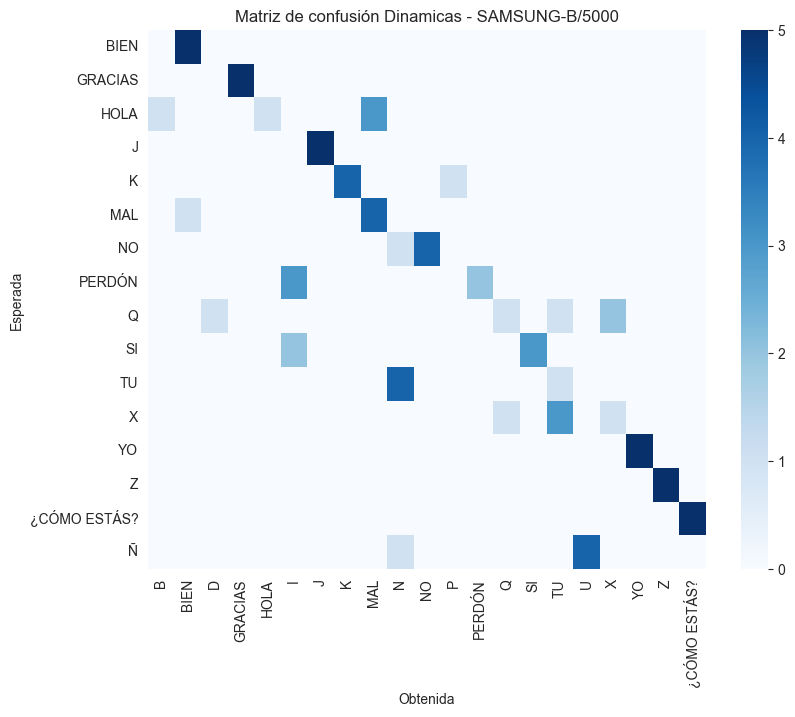

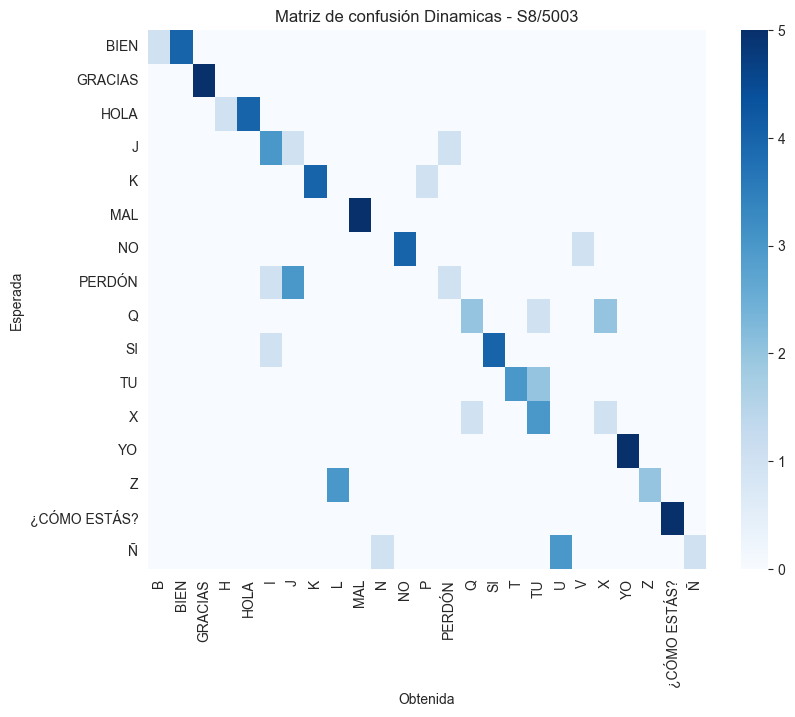

In [165]:
rows = ['HUAWEI/5001', 'SAMSUNG-B/5000','S8/5003']
for i in rows:
    # Crear una tabla cruzada para obtener la matriz de confusión
    confusion_matrix = crosstab(dinamicas['SEÑA ESPERADA'], dinamicas[i], rownames=['Esperada'], colnames=['Obtenida'])

    # Calcular los aciertos y errores
    total_samples = confusion_matrix.sum().sum()
    correct_predictions = sum([confusion_matrix.iloc[i,i] for i in range(len(confusion_matrix))])
    incorrect_predictions = total_samples - correct_predictions

    # Calcular el porcentaje de aciertos
    accuracy = correct_predictions / total_samples
    plt.figure(figsize=(9, 7))
    sns.heatmap(confusion_matrix, cmap='Blues', fmt='g')
    # Ajustar el tamaño del gráfico
    # Agregar el título del gráfico
    plt.title(f"Matriz de confusión Dinamicas - {i}")

    # Agregar el porcentaje de aciertos en el gráfico
    # Mostrar el gráfico
    plt.show()
